In [1]:
# load data frames into pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tags = pd.read_csv("C:\\Users\\Ronald\\Documents\\EECS_731\\Homework3\\ml-latest-small\\tags.csv") 
ratings = pd.read_csv("C:\\Users\\Ronald\\Documents\\EECS_731\\Homework3\\ml-latest-small\\ratings.csv")
movies = pd.read_csv("C:\\Users\\Ronald\\Documents\\EECS_731\\Homework3\\ml-latest-small\\movies.csv")

# print(tags)

In [2]:
# print(ratings)

In [3]:
# organize tags and ratings dfs
# this shows that there are multiple tags with same movie
# need to merge tags with same movies
tags = tags.sort_values(by=['userId', 'movieId'])

# merge tags with same movies
tags = tags.groupby(['userId','movieId'])['tag'].apply(', '.join).reset_index()
# print(tags)

ratings = ratings.sort_values(by=['userId', 'movieId'])
# print(ratings)

In [4]:
# need userIds, movieIds, and tags from tags dataframe
# need userIds, movieIds, and ratings from ratings dataframe
# need to keep movies in ratings df that have tags in tags
# get rid of userIds in ratings dataframe that are not found in tags dataframes
# need tuples to achieve this
tags_um = list(zip(tags.userId, tags.movieId))
ratings_um = list(zip(ratings.userId, ratings.movieId))
tags['userMovie'] = list(zip(tags.userId, tags.movieId))
ratings['userMovie'] = list(zip(ratings.userId, ratings.movieId))
# print(tags)

In [5]:
# print(ratings)

In [6]:
# get rid of ratings of movies that do not have a tag given by user
condition1 = ratings['userMovie'].map(lambda x: x in tags_um and x in ratings_um)
ratings = ratings[condition1].reset_index(drop=True)
# print(ratings)

In [7]:
# tags dataframe still larger, need to trim
condition2 = tags['userMovie'].map(lambda x: x in tags_um and x in ratings_um)
tags = tags[condition2].reset_index(drop=True)
# print(tags)

In [8]:
# merge two ratings and timestamp from ratings df with tags df in new df
ratings_tags = tags
ratings_tags['rating'] = ratings['rating']
ratings_tags['timestamp'] = ratings['timestamp']
ratings_tags.reset_index(drop=True)
ratings_tags.head()

,userId,movieId,tag,userMovie,rating,timestamp
0,2,60756,"funny, Highly quotable, will ferrell","(2, 60756)",5.0,1445714980
1,2,89774,"Boxing story, MMA, Tom Hardy","(2, 89774)",5.0,1445715189
2,2,106782,"drugs, Leonardo DiCaprio, Martin Scorsese","(2, 106782)",5.0,1445714966
3,7,48516,way too long,"(7, 48516)",1.0,1169687318
4,18,431,"Al Pacino, gangster, mafia","(18, 431)",4.0,1462138790


In [9]:
# need to encode tag values, but will prove difficult due to the wide variance of the phrases in tags
# best solution for now is to scroll through data set and see what words or phrases seem to appear 
# most throughout tags column

In [10]:
# encode tags based on recoccuring phrases in tags

d = {'funny': 1, 'comedy': 1, 'hilarious': 1, 'stiller': 1, 'ferrell': 1, 'carell': 1, 'rogen': 1, 'horror': 2, 'creepy': 2, 
     'scary': 2, 'thriller': 2, 'twist': 3, 'suspense': 3, 'tarantino': 3, 'action': 3, 'adventure': 3, 'sci-fi': 4, 'scifi': 4,
     'star wars': 4, 'aliens': 4, 'space': 4, 'robots': 4, 'drama': 5, 'violence': 6, 'drugs': 6, 'mafia': 6, 'de niro': 6,
     'pacino': 6,'fantasy': 7, 'family': 7, 'animation': 7, 'children': 7, 'pixar': 7, 'cartoon': 7, 'disney': 7,
     'chick flick': 8, 'romance': 8, 'romantic': 8, 'dc': 9, 'marvel': 9, 'superhero': 9, 'superman': 9, 'wonderwoman': 9, 
     'batman': 9, 'comic': 9, 'comics': 9}

tag_list = ratings_tags['tag'].tolist()
tag_code = []
for i in range(len(tag_list)):
       tag_code.append(10)
key_count = 0
def_count = 0
i = 0
for tag in tag_list:
    for key in d.keys():
        if key in tag.lower():
            tag_code[i] = d.get(key)
            break
    i = i + 1

# add tags_code to ratings_tags df
ratings_tags['tag_code'] = tag_code
ratings_tags.to_csv("C:\\Users\\Ronald\\Documents\\EECS_731\\Homework3\\ml-latest-small\\model_data.csv")
ratings_tags.head()

,userId,movieId,tag,userMovie,rating,timestamp,tag_code
0,2,60756,"funny, Highly quotable, will ferrell","(2, 60756)",5.0,1445714980,1
1,2,89774,"Boxing story, MMA, Tom Hardy","(2, 89774)",5.0,1445715189,10
2,2,106782,"drugs, Leonardo DiCaprio, Martin Scorsese","(2, 106782)",5.0,1445714966,6
3,7,48516,way too long,"(7, 48516)",1.0,1169687318,10
4,18,431,"Al Pacino, gangster, mafia","(18, 431)",4.0,1462138790,6


Text(0.5,1,'K Means N = 2')

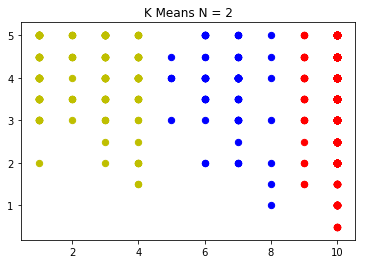

In [11]:
# build KMeans model now that data has been properly cleaned through feature engineering

from sklearn.cluster import KMeans

X = ratings_tags[['tag_code', 'rating']].values

# choose different values for number of clusters
kmeans1 = KMeans(n_clusters=3).fit(X)
kmeans2 = KMeans(n_clusters=4).fit(X)
kmeans3 = KMeans(n_clusters=5).fit(X)
kmeans4 = KMeans(n_clusters=6).fit(X)

# plot different kmeans
colormap1 = ['r', 'y','b']
colormap2 = ['r', 'y', 'b', 'g']
colormap3 = ['r', 'y', 'b', 'g', 'k']
colormap4 = ['r', 'y', 'b', 'g', 'k', 'm']

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c=colormap1[kmeans1.labels_[i]], s=40)
plt.title('K Means N = 2')

Text(0.5,1,'K Means N = 4')

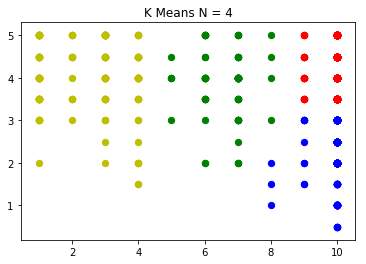

In [12]:
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c=colormap2[kmeans2.labels_[i]], s=40)
plt.title('K Means N = 4')

Text(0.5,1,'K Means N = 5')

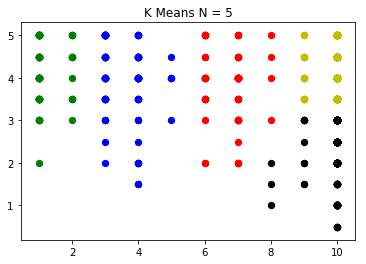

In [13]:
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c=colormap3[kmeans3.labels_[i]], s=40)
plt.title('K Means N = 5')

Text(0.5,1,'K Means N = 6')

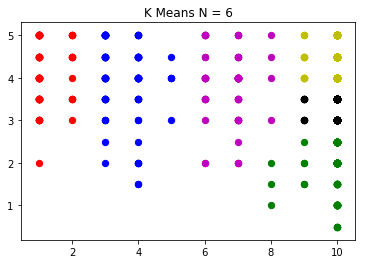

In [14]:
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c=colormap4[kmeans4.labels_[i]], s=40)
plt.title('K Means N = 6')

Text(0.5,1,'DBSCAN number of clusters = 2')

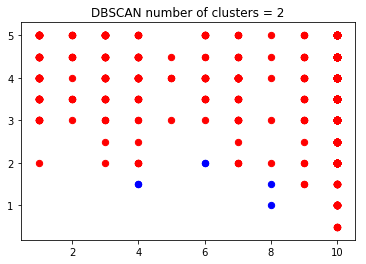

In [15]:
# Good separation of features among all levels
# See what DBSCAN gives
from sklearn.cluster import DBSCAN

# played around with values of epsilon and min samples to estimate good samples of clusters
# number of clusters found by finding the length of the set of labels - print(len(set(labels)))

db1 = DBSCAN(eps=1, min_samples=30).fit(X) # roughly 2 clusters
db2 = DBSCAN(eps=.9, min_samples=40).fit(X) # roughly 4 clusters
db3 = DBSCAN(eps=.8, min_samples=20).fit(X) # roughly 6 clusters

colormap1 = ['r','b']
colormap2 = ['r', 'y', 'b', 'g']
colormap3 = ['r', 'y', 'b', 'g', 'k', 'm']

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c=colormap1[db1.labels_[i]], s=40)
plt.title('DBSCAN number of clusters = 2')

Text(0.5,1,'DBSCAN number of clusters = 4')

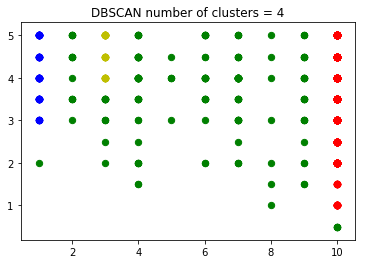

In [16]:
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c=colormap2[db2.labels_[i]], s=40)
plt.title('DBSCAN number of clusters = 4')

Text(0.5,1,'DBSCAN number of clusters = 6')

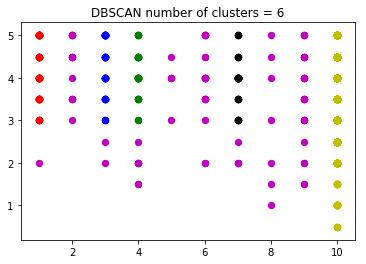

In [17]:
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c=colormap3[db3.labels_[i]], s=40)
plt.title('DBSCAN number of clusters = 6')

In [18]:
# DBSCAN seems to get better as number of clusters increase

# In general, need to find better way to encode tags of users in order to create better clustering models